In [47]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import AgglomerativeClustering, Birch

In [ ]:
file = ".\\Assets\\Data\\HTRU_2.csv"
data = pd.read_csv(file, header=None)

In [49]:
data.columns = [
    "Mean_IP", "Std_IP", "Kurtosis_IP", "Skewness_IP",
    "Mean_DM_SNR", "Std_DM_SNR", "Kurtosis_DM_SNR", "Skewness_DM_SNR", "Label"
]

In [ ]:
X = data.iloc[:, :-1]  
y = data.iloc[:, -1]   

In [51]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [52]:
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)
print(f"PCA Explained Variance Ratio: {pca.explained_variance_ratio_}")

PCA Explained Variance Ratio: [0.51675584 0.26807564]


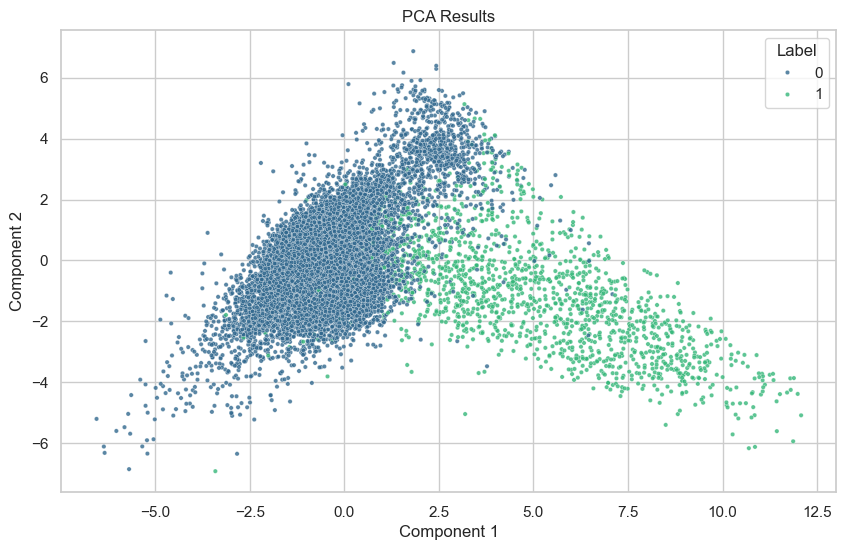

In [53]:
def plot_reduction(X_reduced, title, labels):
    plt.figure(figsize=(10, 6))
    sns.scatterplot(
        x=X_reduced[:, 0], y=X_reduced[:, 1], hue=labels,
        palette="viridis", s=10, alpha=0.8
    )
    plt.title(title)
    plt.xlabel("Component 1")
    plt.ylabel("Component 2")
    plt.legend(title="Label", loc="best")
    plt.show()

plot_reduction(X_pca, "PCA Results", y)


## K-Means Clustering

K-Means is a well-known and widely used clustering algorithm. It operates by partitioning the data into a specified number of clusters, denoted as `k`. The process is iterative and aims to minimize the variance within each cluster.

### Steps:
1. **Initialization**: Select `k` initial centroids, either randomly or through a heuristic.
2. **Assignment**: Assign each data point to the nearest centroid.
3. **Update**: Recalculate the centroids as the mean of all the points assigned to each cluster.
4. **Convergence**: Repeat the assignment and update steps until the centroids no longer change or the maximum number of iterations is reached.

### Strengths:
- The algorithm is efficient and relatively straightforward to implement.
- It works well when the clusters are spherical in shape and have similar sizes.

### Limitations:
- The number of clusters, `k`, must be specified in advance.
- K-Means may struggle with non-globular clusters or clusters of varying sizes and densities.


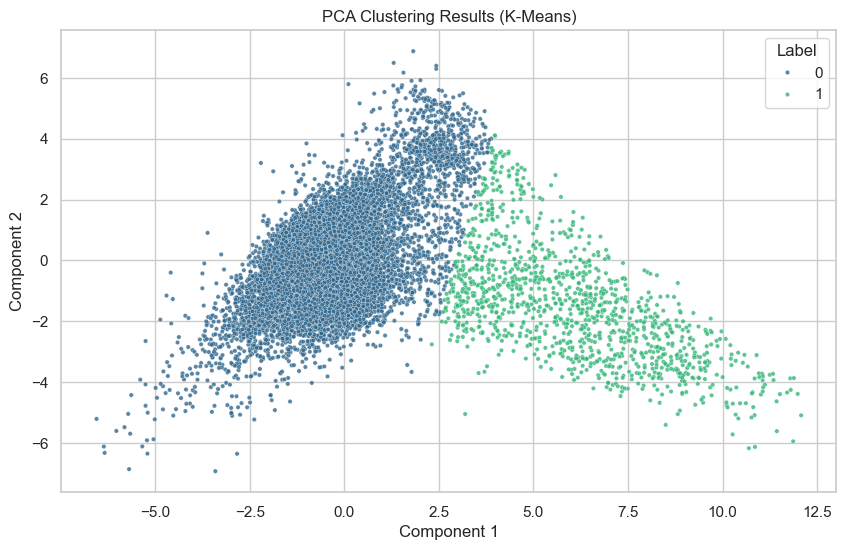

In [ ]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=2)  
clusters_kmeans = kmeans.fit_predict(X_pca)
plot_reduction(X_pca, "PCA Clustering Results (K-Means)", clusters_kmeans)

## Agglomerative Clustering

Agglomerative Clustering is a hierarchical clustering method that follows a bottom-up approach. Initially, each data point is considered its own cluster, and pairs of clusters are merged as the algorithm progresses.

### Steps:
1. **Initialization**: Start with each data point as its own cluster.
2. **Merge**: Identify the two closest clusters and merge them into one.
3. **Repeat**: Continue merging the closest clusters until the desired number of clusters is achieved or a specific distance threshold is met.

### Strengths:
- Does not require the number of clusters to be predefined.
- Capable of capturing complex cluster shapes that are not necessarily spherical.

### Limitations:
- Computational complexity increases as the dataset grows.
- May be less efficient for large datasets compared to other clustering methods.

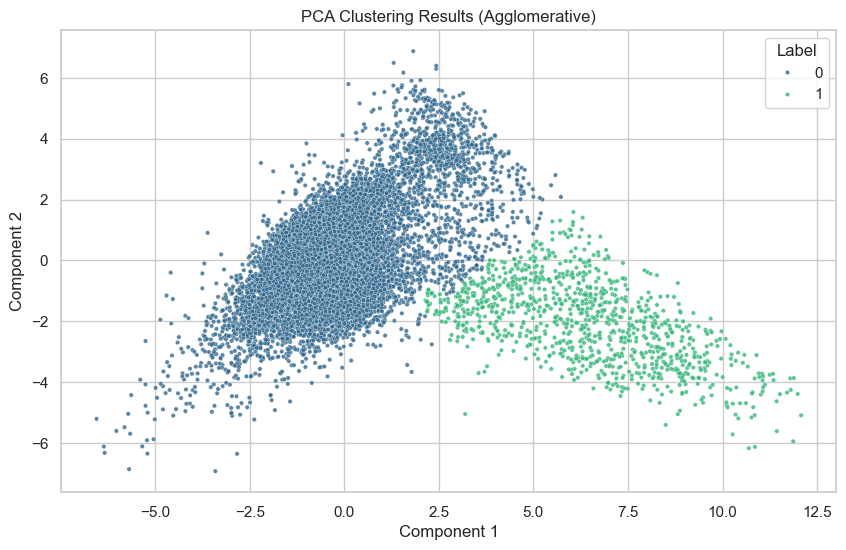

In [ ]:
# Agglomerative Clustering
agg_clustering = AgglomerativeClustering(n_clusters=2)  
clusters_agg = agg_clustering.fit_predict(X_pca)
plot_reduction(X_pca, "PCA Clustering Results (Agglomerative)", clusters_agg)

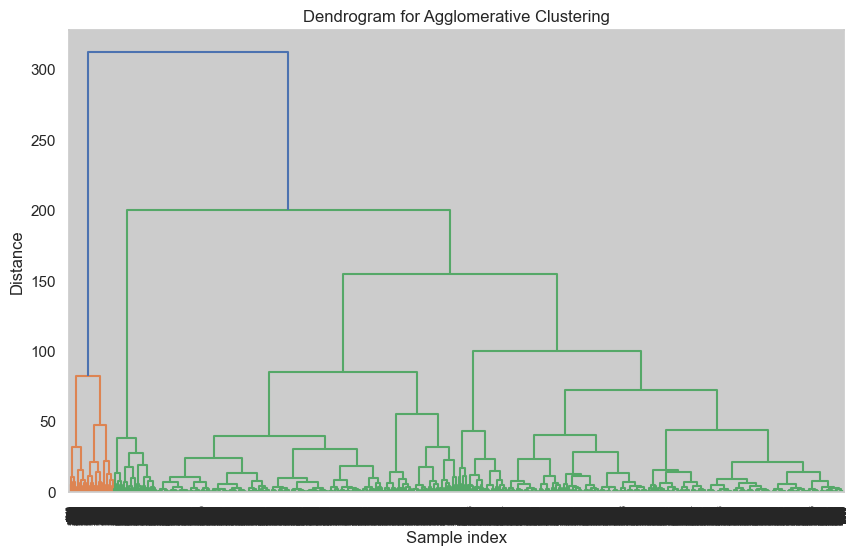

In [ ]:

from scipy.cluster.hierarchy import dendrogram, linkage


Z = linkage(X_pca, 'ward')  

# Plot dendrogram
plt.figure(figsize=(10, 6))
dendrogram(Z, color_threshold=0.7 * max(Z[:, 2]))  
plt.title('Dendrogram for Agglomerative Clustering')
plt.xlabel('Sample index')
plt.ylabel('Distance')
plt.show()


## BIRCH Clustering

BIRCH (Balanced Iterative Reducing and Clustering using Hierarchies) is an efficient clustering algorithm designed for large datasets. It constructs a tree-like structure, known as the CF (clustering feature) tree, to summarize the data and perform clustering in a scalable manner.

### Steps:
1. **Tree Construction**: Build a CF tree where each node summarizes the features of a subset of the data.
2. **Clustering**: Apply a secondary clustering method (e.g., K-Means) on the leaf nodes of the CF tree to form final clusters.

### Strengths:
- Efficient and scalable for large datasets.
- Suitable for incremental clustering.

### Limitations:
- Performance can degrade when the number of clusters is large.
- Sensitive to the initial construction of the CF tree.

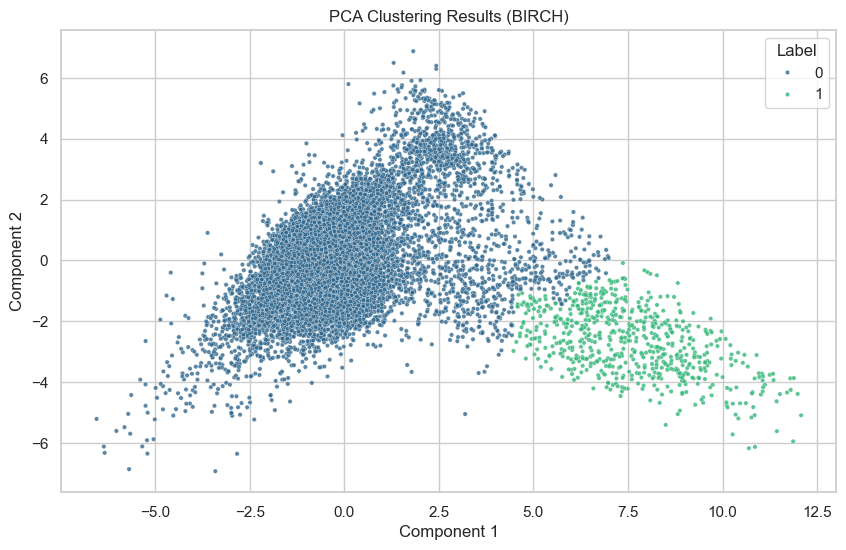

In [ ]:
# BIRCH Clustering
birch_clustering = Birch(n_clusters=2)  
clusters_birch = birch_clustering.fit_predict(X_pca)
plot_reduction(X_pca, "PCA Clustering Results (BIRCH)", clusters_birch)

In [59]:
from sklearn.metrics import silhouette_score
silhouette_kmeans = silhouette_score(X_pca, clusters_kmeans)
print(f"K-Means Silhouette Score: {silhouette_kmeans:.4f}")

K-Means Silhouette Score: 0.6867


In [60]:
silhouette_agg = silhouette_score(X_pca, clusters_agg)
print(f"Agglomerative Clustering Silhouette Score: {silhouette_agg:.4f}")

Agglomerative Clustering Silhouette Score: 0.6964


In [61]:
silhouette_birch = silhouette_score(X_pca, clusters_birch)
print(f"BIRCH Clustering Silhouette Score: {silhouette_birch:.4f}")

BIRCH Clustering Silhouette Score: 0.7213
